### <center>Лабораторна робота №0. <br> Використання основних функцій бібліотек візуального аналізу</center>

**Повторіть лекцій матеріал слідуючи інструкціям**

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

Доступ до даних на google drive, якщо ви відкриваєте блокнот в google colab, а не на PC, можна отримати шляхом монтування google drive


In [2]:
#Uncomment if use in google collab
"""
!pip install google-colab
!pip install pydrive
"""

In [3]:
"""
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
"""

In [4]:
"""
downloaded = drive.CreateFile({'id':"1LQsRF29uZoHfVfB7zsFgtJcH2tjxBJcr"})
downloaded.GetContentFile('telecom_churn.csv')
"""

In [28]:
#df = pd.read_csv('telecom_churn.csv')
df = pd.read_csv('telecom_churn.csv')

In [29]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


# 1. Візуалізація характеристик ознак по одній 
## 1.1. Кількісні
Гістограма і боксплот

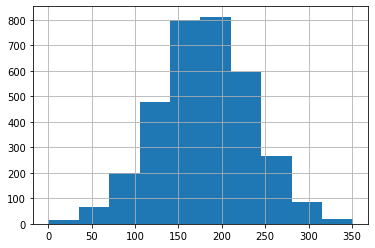

In [30]:
df['Total day minutes'].hist()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


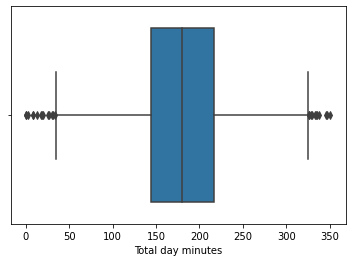

In [31]:
sns.boxplot(df['Total day minutes']);

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feb330cc0b8>,
      dtype=object)

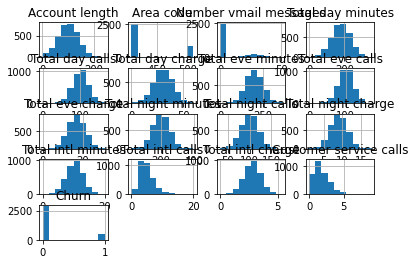

In [32]:
df_temp = df.copy()
df_temp["Churn"] = df_temp["Churn"].apply(lambda churn: 1 if churn else 0)
df_temp.hist()

# 1.2. Категоріальні
countplot

In [33]:
df['State'].value_counts().head()

WV    106
MN     84
NY     83
AL     80
WI     78
Name: State, dtype: int64

In [34]:
df['Churn'].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


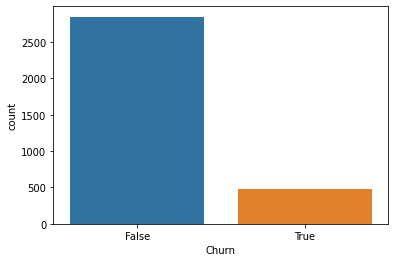

In [35]:
sns.countplot(df['Churn']);

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


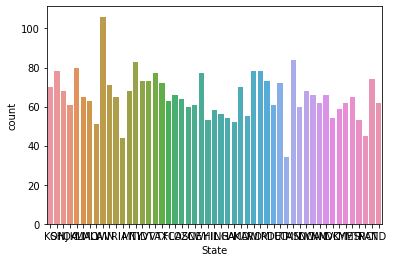

In [36]:
sns.countplot(df['State']);

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


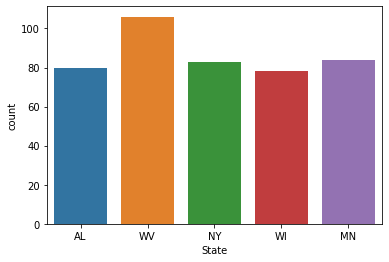

In [37]:
sns.countplot(df[df['State'].\
                 isin(df['State'].value_counts().head().index)]['State']);

# 2. Взаємодія ознак
## 2.1. Кількісна з кількісною
pairplot, scatterplot, кореляція, heatmap

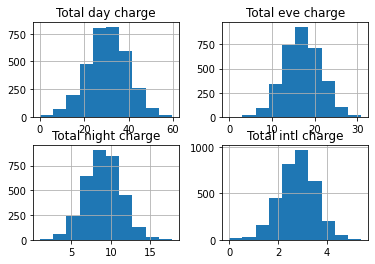

In [38]:
feat = [f for f in df.columns if 'charge' in f]

df[feat].hist();

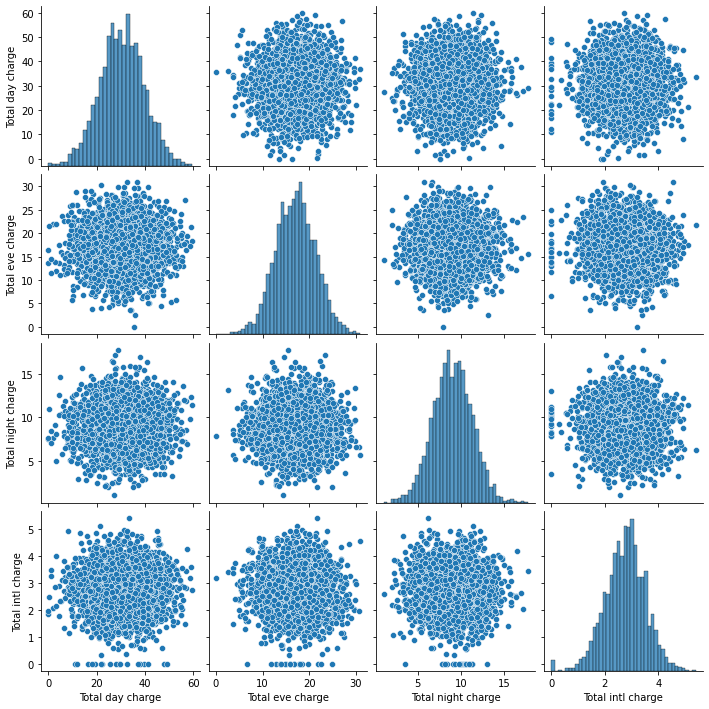

In [39]:
sns.pairplot(df[feat]);

In [40]:
df['Churn'].map({False: 'blue', True: 'orange'}).head()

0    blue
1    blue
2    blue
3    blue
4    blue
Name: Churn, dtype: object

In [41]:
df[~df['Churn']].head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


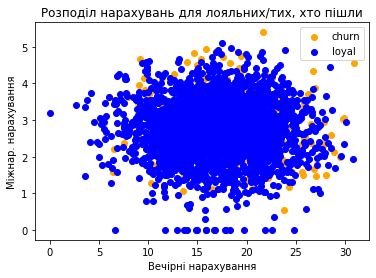

In [42]:
plt.scatter(df[df['Churn']]['Total eve charge'], 
            df[df['Churn']]['Total intl charge'],
           color='orange', label='churn');
plt.scatter(df[~df['Churn']]['Total eve charge'], 
            df[~df['Churn']]['Total intl charge'],
           color='blue', label='loyal');
plt.xlabel('Вечірні нарахування');
plt.ylabel('Міжнар. нарахування');
plt.title('Розподіл нарахувань для лояльних/тих, хто пішли');
plt.legend();

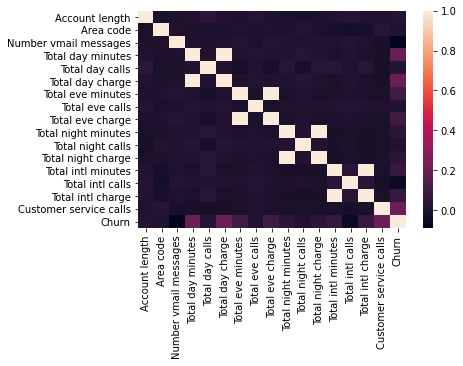

In [43]:
sns.heatmap(df.corr());

In [44]:
df.drop(feat, axis=1, inplace=True)

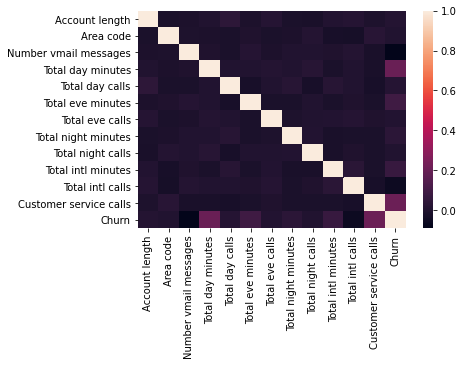

In [45]:
sns.heatmap(df.corr());

## 2.2.  Кількісний з категоріальним
boxplot, violinplot

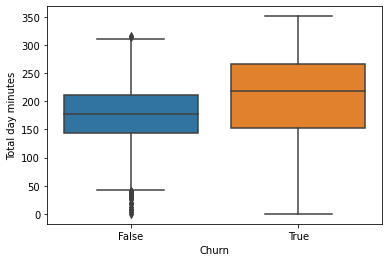

In [46]:
sns.boxplot(x='Churn', y='Total day minutes', data=df);

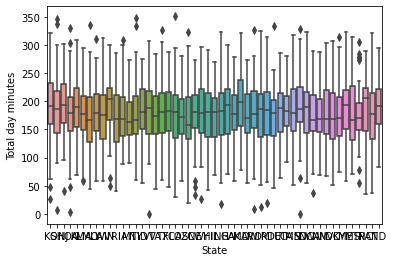

In [47]:
sns.boxplot(x='State', y='Total day minutes', data=df);

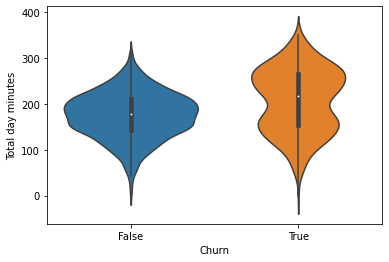

In [48]:
sns.violinplot(x='Churn', y='Total day minutes', data=df);

In [49]:
df.groupby('International plan')['Total day minutes'].mean()

International plan
No     178.893887
Yes    187.986997
Name: Total day minutes, dtype: float64

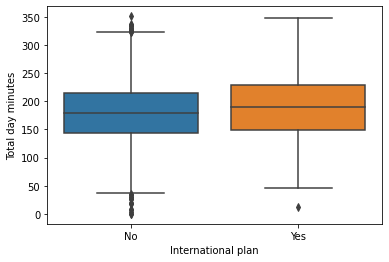

In [50]:
sns.boxplot(x='International plan', y='Total day minutes', data=df);

## 2.3. Категоріальний з категоріальним
countplot

In [51]:
pd.crosstab(df['Churn'], df['International plan'])

International plan,No,Yes
Churn,,
False,2664,186
True,346,137


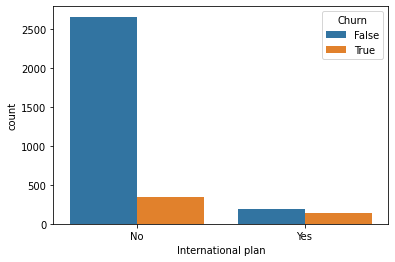

In [52]:
sns.countplot(x='International plan', hue='Churn', data=df);

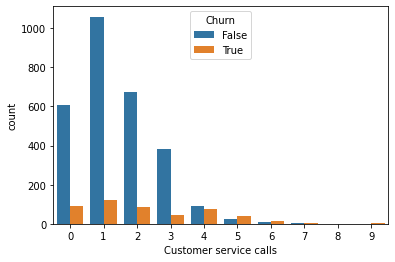

In [53]:
sns.countplot(x='Customer service calls', hue='Churn', data=df);

## 3. Інше
Manifold learning, один з представників – t-SNE

In [54]:
from sklearn.manifold import TSNE

In [55]:
tsne = TSNE(random_state=0)

In [56]:
df2 = df.drop(['State', 'Churn'], axis=1)

In [57]:
df2['International plan'] = df2['International plan'].map({'Yes': 1, 
                                                             'No': 0})
df2['Voice mail plan'] = df2['Voice mail plan'].map({'Yes': 1, 
                                                             'No': 0})

In [58]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Account length          3333 non-null   int64  
 1   Area code               3333 non-null   int64  
 2   International plan      3333 non-null   int64  
 3   Voice mail plan         3333 non-null   int64  
 4   Number vmail messages   3333 non-null   int64  
 5   Total day minutes       3333 non-null   float64
 6   Total day calls         3333 non-null   int64  
 7   Total eve minutes       3333 non-null   float64
 8   Total eve calls         3333 non-null   int64  
 9   Total night minutes     3333 non-null   float64
 10  Total night calls       3333 non-null   int64  
 11  Total intl minutes      3333 non-null   float64
 12  Total intl calls        3333 non-null   int64  
 13  Customer service calls  3333 non-null   int64  
dtypes: float64(4), int64(10)
memory usage: 3

In [59]:
%%time
tsne.fit(df2)

CPU times: user 1min 5s, sys: 201 ms, total: 1min 5s
Wall time: 33.5 s


TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
     method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
     n_components=2, n_iter=1000, n_iter_without_progress=300, n_jobs=None,
     perplexity=30.0, random_state=0, verbose=0)

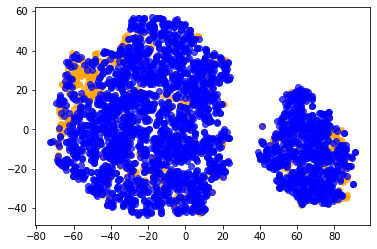

In [60]:
plt.scatter(tsne.embedding_[df['Churn'].values, 0], 
            tsne.embedding_[df['Churn'].values, 1], 
            color='orange', alpha=.7);
plt.scatter(tsne.embedding_[~df['Churn'].values, 0], 
            tsne.embedding_[~df['Churn'].values, 1], 
            color='blue', alpha=.7);